In [20]:
from fastai.vision import *
ImageDataBunch.from_folder??

Signature:
ImageDataBunch.from_folder(
    path: Union[pathlib.Path, str],
    train: Union[pathlib.Path, str] = 'train',
    valid: Union[pathlib.Path, str] = 'valid',
    valid_pct=None,
    seed: int = None,
    classes: Collection = None,
    **kwargs: Any,
) -> 'ImageDataBunch'
Source:   
    @classmethod
    def from_folder(cls, path:PathOrStr, train:PathOrStr='train', valid:PathOrStr='valid',
                    valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any)->'ImageDataBunch':
        "Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`)."
        path=Path(path)
        il = ImageList.from_folder(path)
        if valid_pct is None: src = il.split_by_folder(train=train, valid=valid)
        else: src = il.split_by_rand_pct(valid_pct, seed)
        src = src.label_from_folder(classes=classes)
        return cls.create_from_ll(src, **kwargs)
File:      ~/anaconda3/envs/zindi_farmpin/lib/python3.7/site-p

In [22]:
ImageList.from_folder(path)

OSError: cannot identify image file '/Users/renier.botha/dev/personal/ds/zindi/farm-pin/data/processed/stacked_images/res_10/train/9/2553.npy'

In [32]:
np.random.seed(42)
path = '../data/processed/stacked_images/res_10/train'
data = ImageDataBunch.from_folder(path,
                                  train='.',
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=256,
                                  num_workers=0).normalize(imagenet_stats)

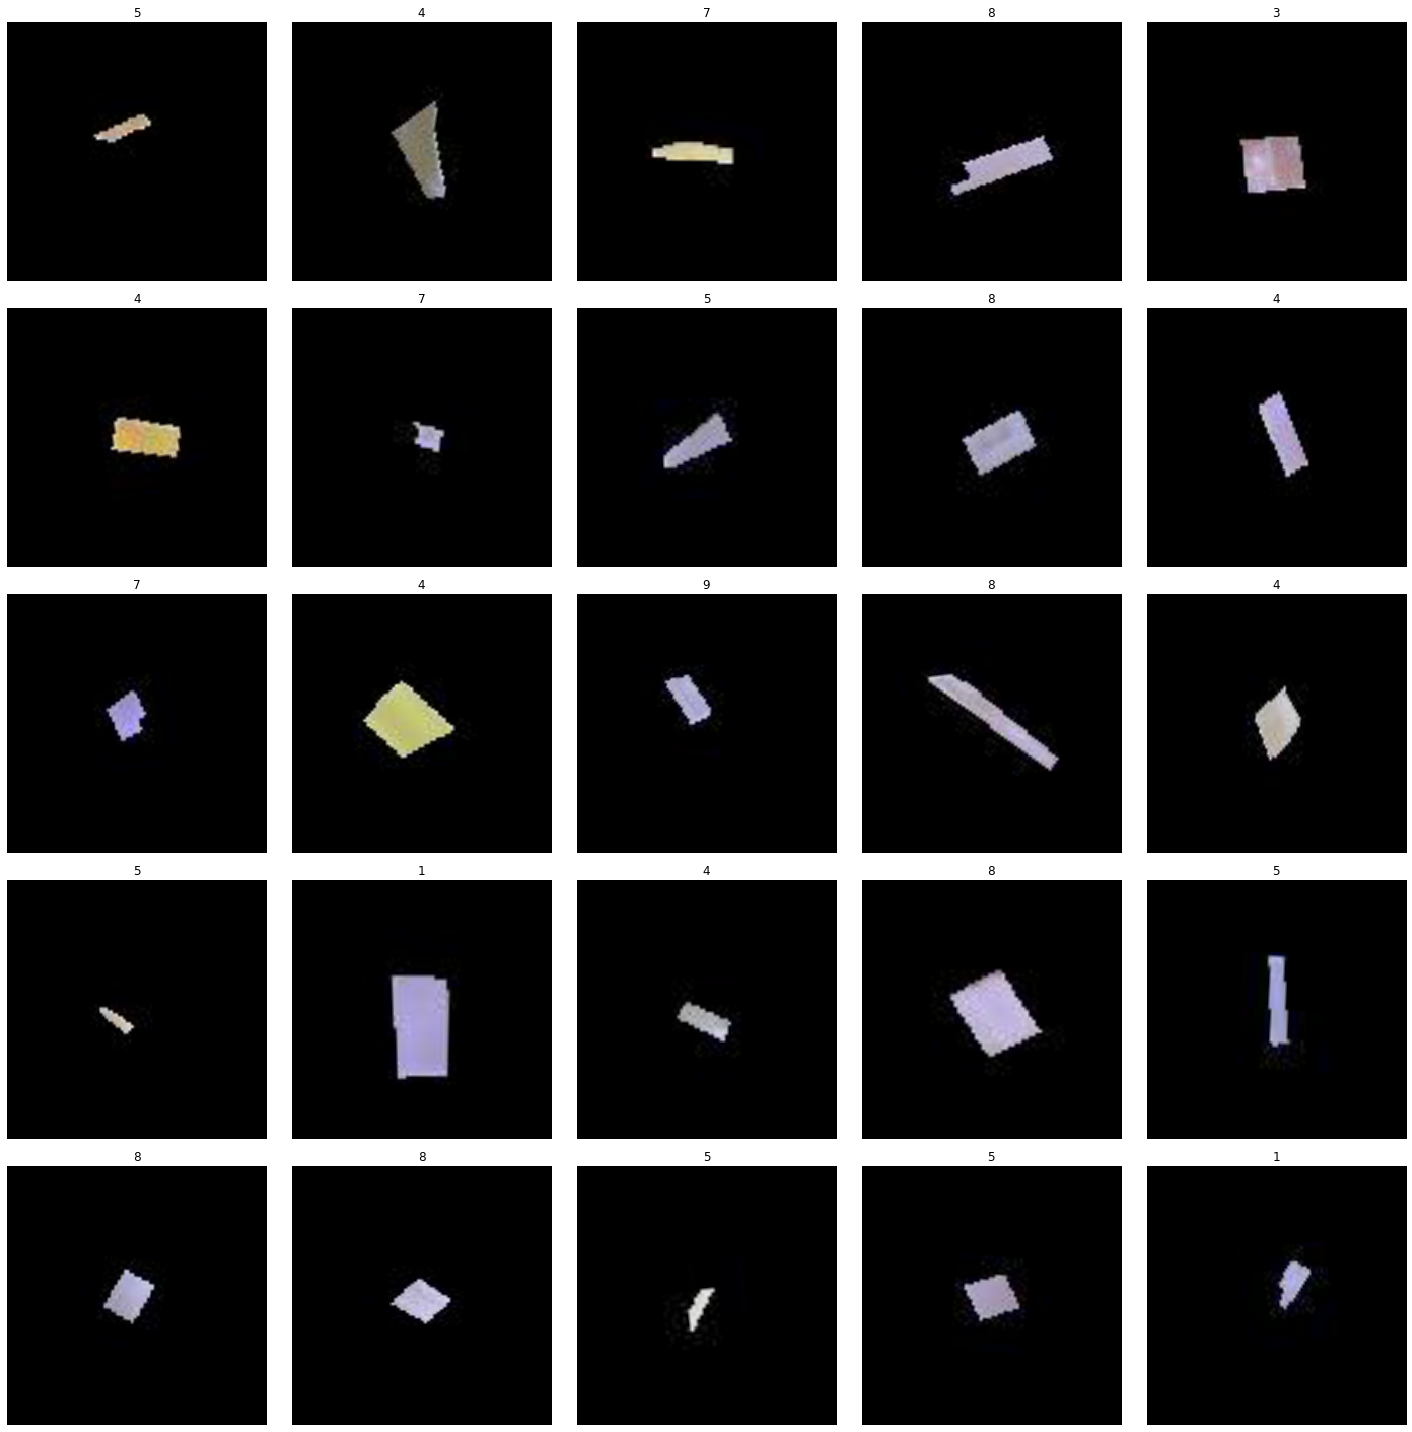

In [33]:
data.show_batch()

In [34]:
data.classes

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [35]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/renier.botha/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [01:36<00:00, 904971.00it/s] 


In [36]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.524830,1.898528,0.624498,11:48
1,2.173130,1.742260,0.568273,11:57
2,1.962253,1.684175,0.544177,12:03
3,1.826352,1.673270,0.540161,11:37


In [38]:
learner.save('stage-1')

In [39]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

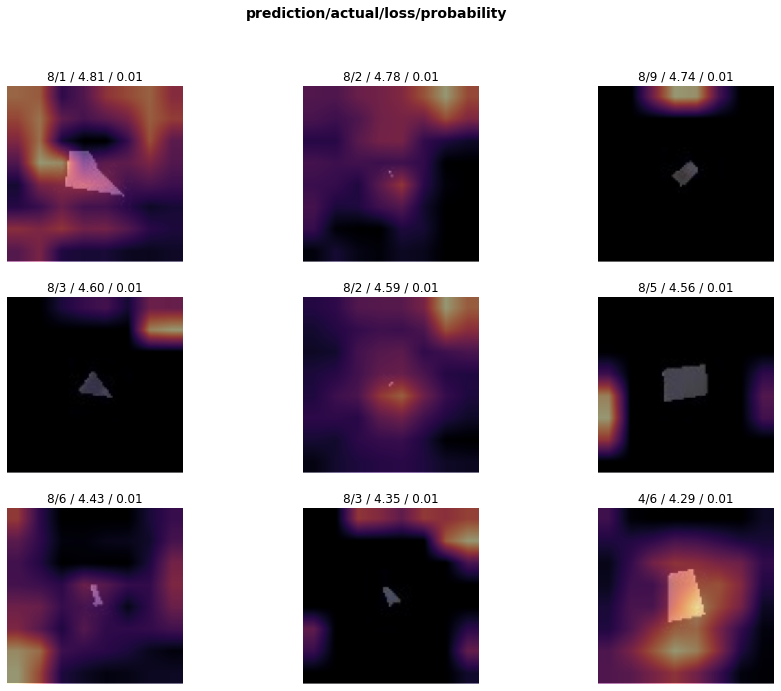

In [40]:
interp.plot_top_losses(9, figsize=(15,11))

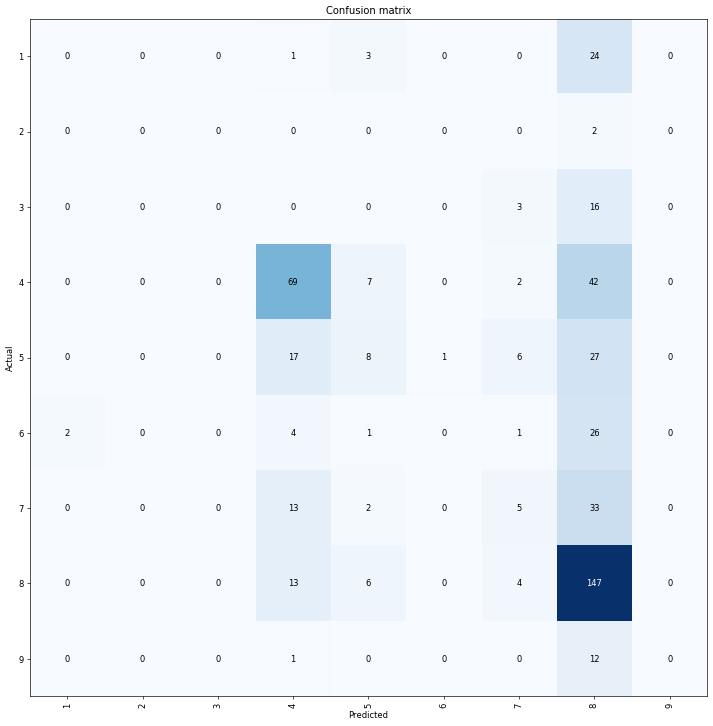

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [42]:
interp.most_confused(min_val=2)

[('4', '8', 42),
 ('7', '8', 33),
 ('5', '8', 27),
 ('6', '8', 26),
 ('1', '8', 24),
 ('5', '4', 17),
 ('3', '8', 16),
 ('7', '4', 13),
 ('8', '4', 13),
 ('9', '8', 12),
 ('4', '5', 7),
 ('5', '7', 6),
 ('8', '5', 6),
 ('6', '4', 4),
 ('8', '7', 4),
 ('1', '5', 3),
 ('3', '7', 3),
 ('2', '8', 2),
 ('4', '7', 2),
 ('6', '1', 2),
 ('7', '5', 2)]

In [43]:
learner.load('stage-1');

In [44]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


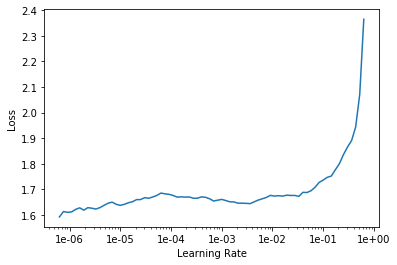

In [45]:
learner.recorder.plot()